# Analysis of the vemurafenib trial

This notebook reproduces the analysis of the vemurafenib trial in the [RoBoT paper](https://academic.oup.com/biostatistics/article/22/4/897/5736525), but using simpler models.

In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
import sys
from os.path import exists

sys.path.append('..')
sys.path.append('.')

In [3]:
import numpy as np
import pandas as pd
import arviz as az

In [4]:
from pyBasket.env import Trial, EmpiricalSite
from pyBasket.common import DEFAULT_EFFICACY_CUTOFF, DEFAULT_FUTILITY_CUTOFF, MODEL_INDEPENDENT, MODEL_BHM

In [5]:
DEBUG = True

In [6]:
num_burn_in = 5E3
num_posterior_samples = 5E3
num_chains = None # let pymc decide

In [7]:
if DEBUG:
    num_burn_in = 1E3
    num_posterior_samples = 1E3
    num_chains = 1

### Generate data

In [8]:
K = 6    # the number of groups
p0 = 0.15 # null response rate
p1 = 0.45 # target response rate

evaluate_interim = [True]
analysis_names = [MODEL_INDEPENDENT, MODEL_BHM]

In [9]:
basket_info = [
    ['ATC', 2, 7],
    ['ECD/LC', 6, 14],
    ['CCA', 1, 8],
    ['CRC-V', 1, 26],
    ['CRC-V', 0, 10],
    ['NSCLC', 8, 19]
]

sites = [EmpiricalSite(b[0], b[1], b[2]) for b in basket_info]
sites

In [10]:
futility_cutoff = DEFAULT_FUTILITY_CUTOFF
efficacy_cutoff = DEFAULT_EFFICACY_CUTOFF
early_futility_stop = False
early_efficacy_stop = False

In [11]:
trial = Trial(K, p0, p1, sites, evaluate_interim, 
              num_burn_in, num_posterior_samples, analysis_names, 
              futility_cutoff=futility_cutoff, efficacy_cutoff=efficacy_cutoff,
              early_futility_stop=early_futility_stop,
              early_efficacy_stop=early_efficacy_stop,              
              num_chains=num_chains)

done = trial.reset()
while not done:
    done = trial.step()


########## Stage=0 ##########

Registering Group 0 (OPEN): 2/7 for Analysis independent
Registering Group 0 (OPEN): 2/7 for Analysis BHM
Registering Group 1 (OPEN): 6/14 for Analysis independent
Registering Group 1 (OPEN): 6/14 for Analysis BHM
Registering Group 2 (OPEN): 1/8 for Analysis independent
Registering Group 2 (OPEN): 1/8 for Analysis BHM
Registering Group 3 (OPEN): 1/26 for Analysis independent
Registering Group 3 (OPEN): 1/26 for Analysis BHM
Registering Group 4 (OPEN): 0/10 for Analysis independent
Registering Group 4 (OPEN): 0/10 for Analysis BHM
Registering Group 5 (OPEN): 8/19 for Analysis independent
Registering Group 5 (OPEN): 8/19 for Analysis BHM

Running inference for: independent


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [alpha, beta, basket_p]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 3 seconds.


,prob,futile,effective
k,,,
0,0.825,None,False
1,0.992,None,True
2,0.460,None,False
3,0.037,None,False
4,0.096,None,False
5,0.996,None,True


Running inference for: BHM


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [z_alpha, mu_alpha, sigma_alpha]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 5 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7971, but should be close to 0.95. Try to increase the number of tuning steps.


,prob,futile,effective
k,,,
0,0.785,None,False
1,0.971,None,True
2,0.498,None,False
3,0.190,None,False
4,0.270,None,False
5,0.984,None,True


### Check last results

### Independent

In [12]:
analysis_name = analysis_names[0]
analysis_name

'independent'

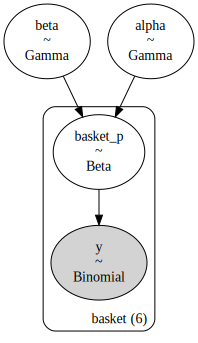

In [13]:
trial.visualise_model(analysis_name)

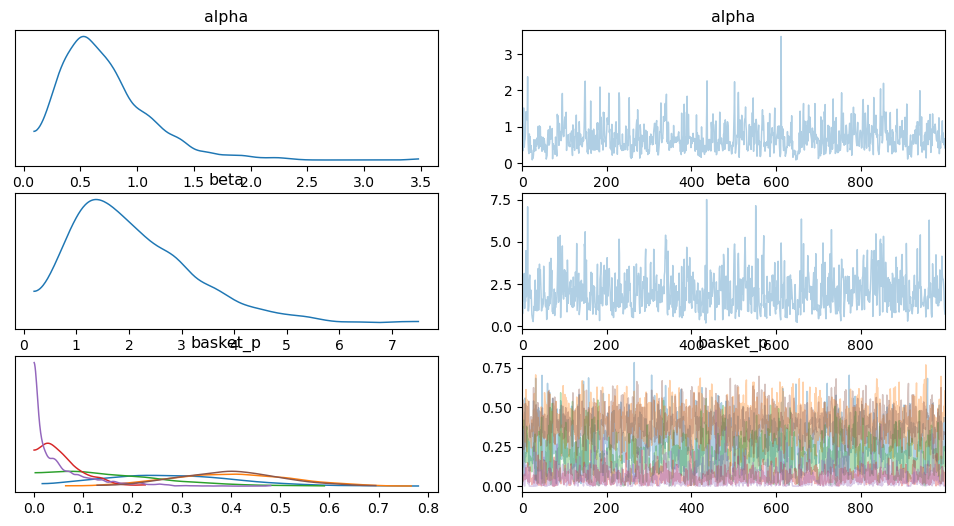

In [14]:
trial.plot_trace(analysis_name, -1)

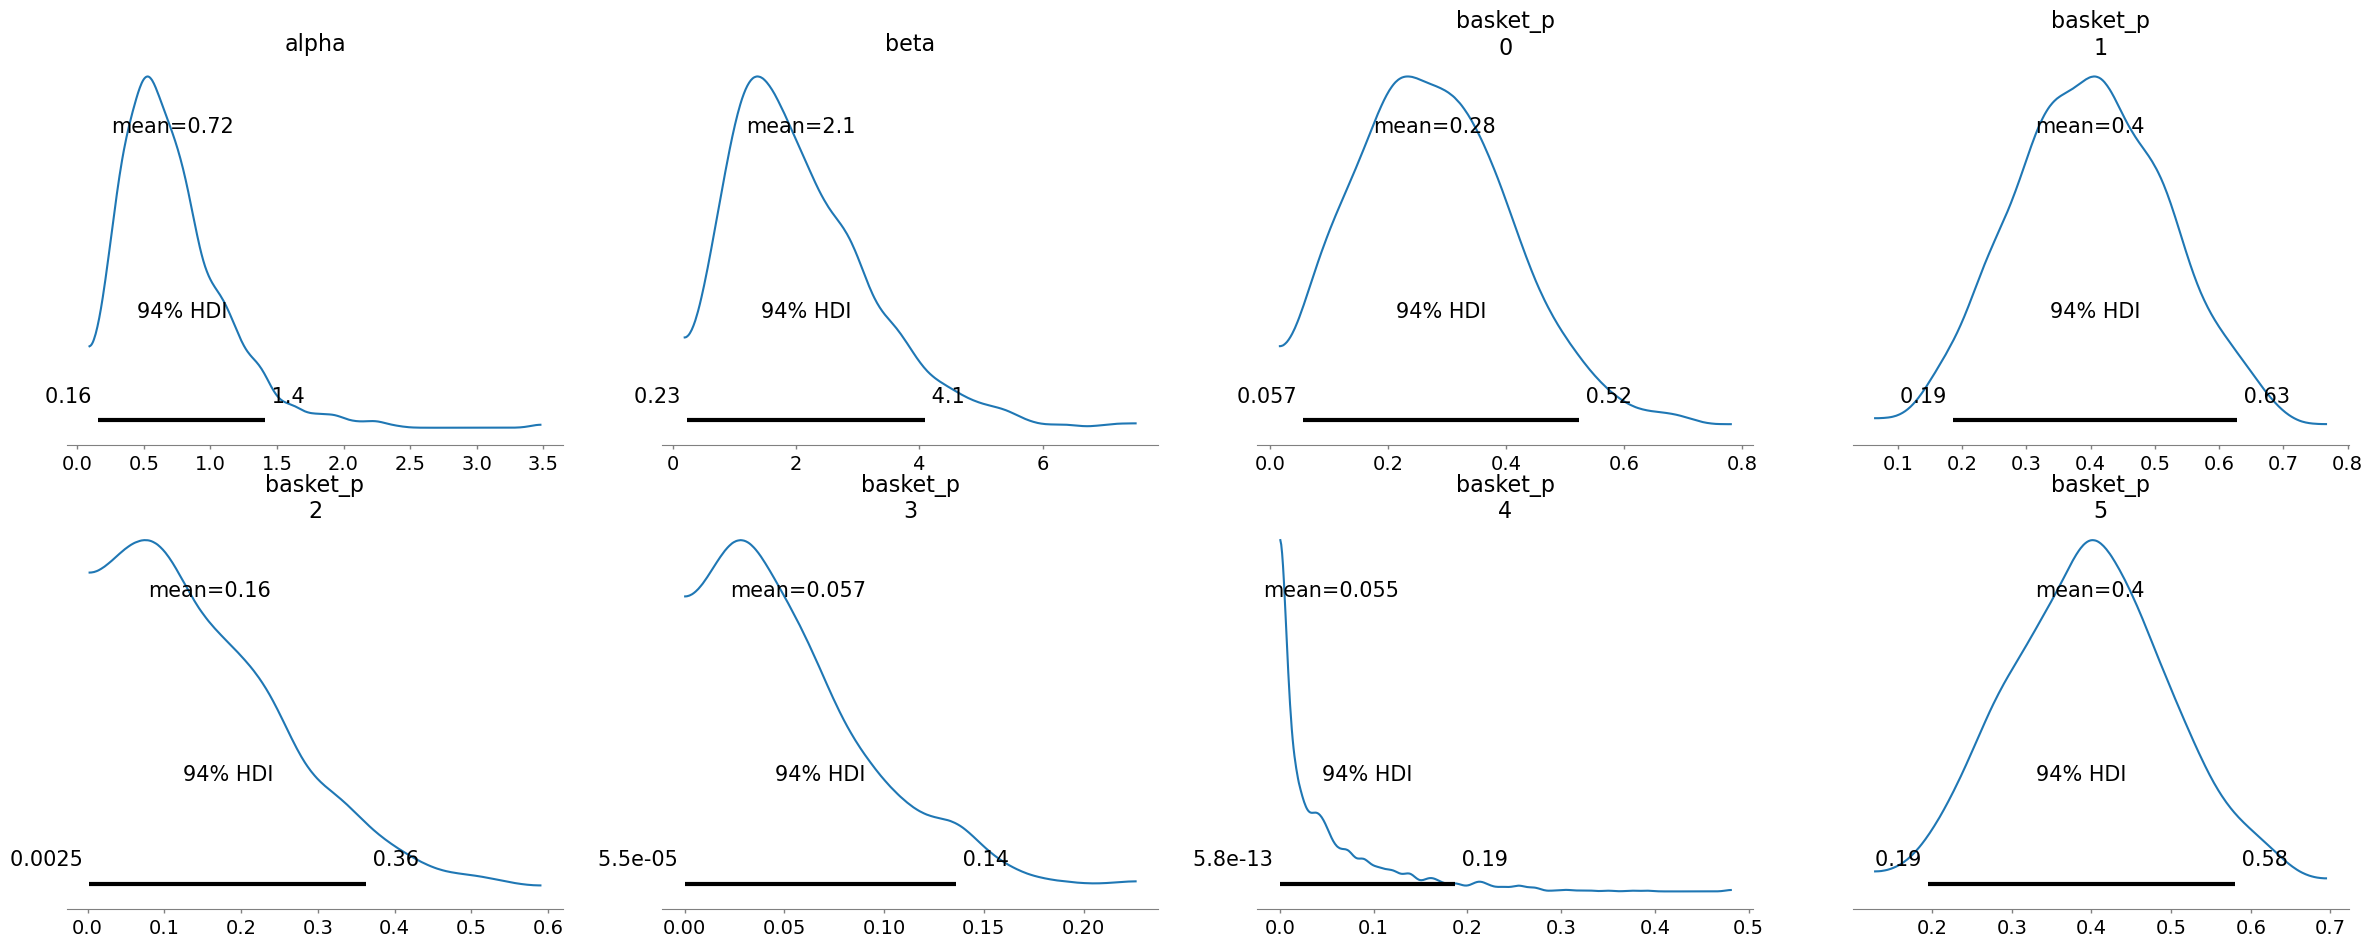

In [15]:
trial.plot_posterior(analysis_name, -1)

In [16]:
trial.final_report(analysis_name)

,status,nnz,total
k,,,
0,COMPLETED_INEFFECTIVE,2,7
1,COMPLETED_EFFECTIVE,6,14
2,COMPLETED_INEFFECTIVE,1,8
3,COMPLETED_INEFFECTIVE,1,26
4,COMPLETED_INEFFECTIVE,0,10
5,COMPLETED_EFFECTIVE,8,19


### BHM

In [17]:
analysis_name = analysis_names[1]
analysis_name

'BHM'

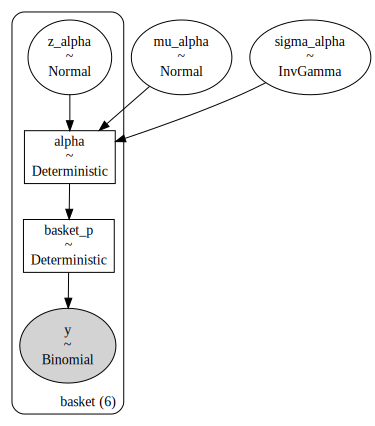

In [18]:
trial.visualise_model(analysis_name)

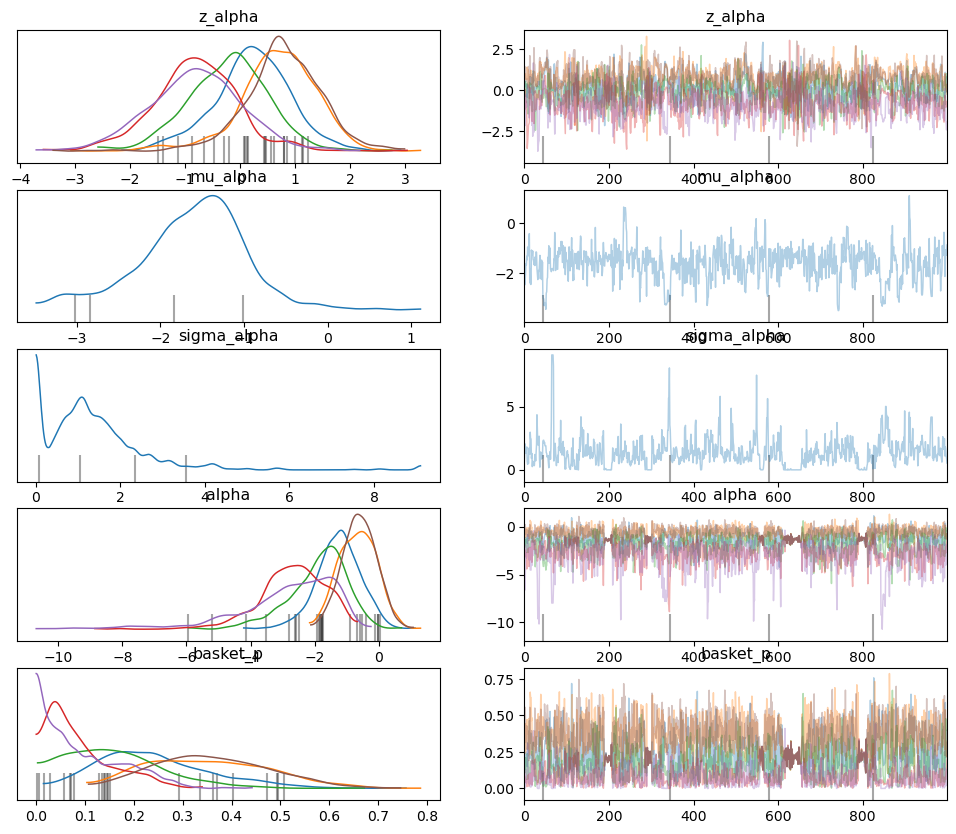

In [19]:
trial.plot_trace(analysis_name, -1)

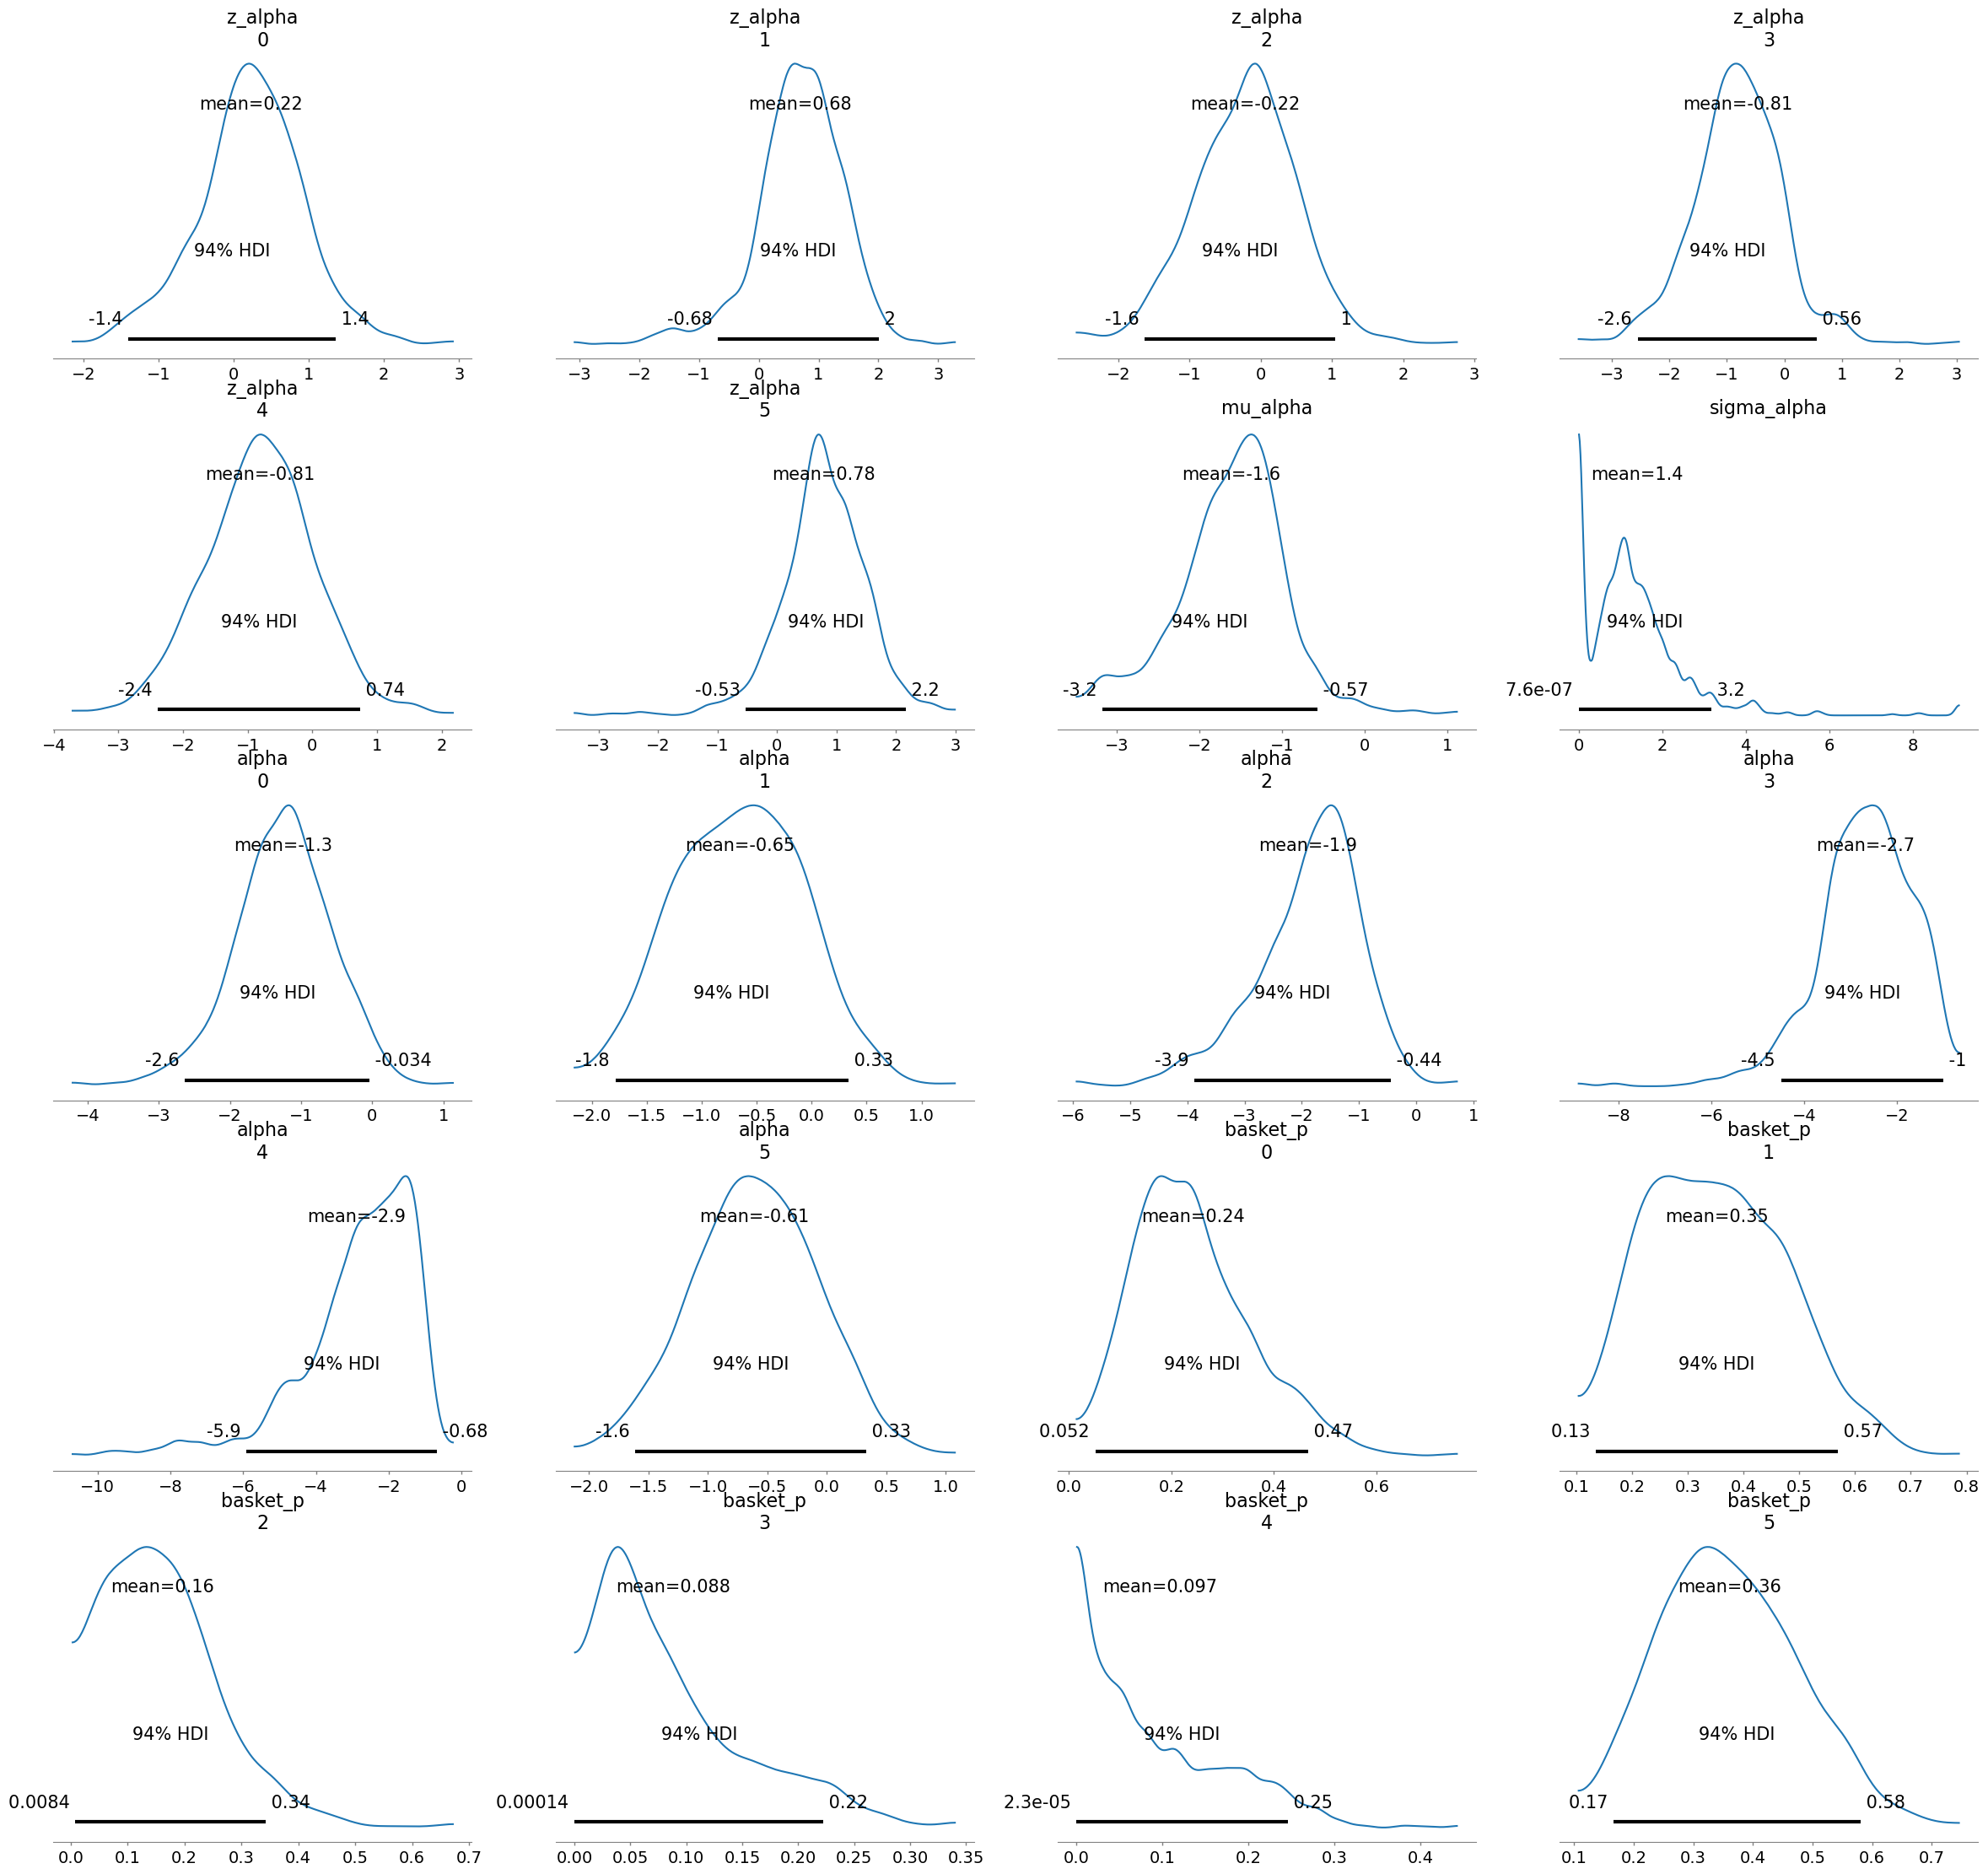

In [20]:
trial.plot_posterior(analysis_name, -1)

In [21]:
trial.final_report(analysis_name)

,status,nnz,total
k,,,
0,COMPLETED_INEFFECTIVE,2,7
1,COMPLETED_EFFECTIVE,6,14
2,COMPLETED_INEFFECTIVE,1,8
3,COMPLETED_INEFFECTIVE,1,26
4,COMPLETED_INEFFECTIVE,0,10
5,COMPLETED_EFFECTIVE,8,19
